<a href="https://colab.research.google.com/github/BharathiVetukuri/CMPE-255-PyCaret/blob/main/A3_PyCaret_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 64.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This 

In [ ]:
#load sample dataset from pycaret dataset model
from pycaret.datasets import get_data
data = get_data('employee')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [ ]:
#SetUp
from pycaret.classification import *
s = setup(data, target = 'salary', session_id = '123')


,Description,Value
0,Session id,123
1,Target,salary
2,Target type,Multiclass
3,Target mapping,"high: 0, low: 1, medium: 2"
4,Original data shape,"(14999, 10)"
5,Transformed data shape,"(14999, 19)"
6,Transformed train set shape,"(10499, 19)"
7,Transformed test set shape,"(4500, 19)"
8,Numeric features,8
9,Categorical features,1


In [ ]:
#import RegressionExperiment and import the class
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [ ]:
#check the type of exp
type(exp)

pycaret.regression.oop.RegressionExperiment

In [ ]:
#init setup on exp
exp.setup(data, target = 'salary', session_id = '123')

,Description,Value
0,Session id,123
1,Target,salary
2,Target type,Regression
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 19)"
5,Transformed train set shape,"(10499, 19)"
6,Transformed test set shape,"(4500, 19)"
7,Numeric features,8
8,Categorical features,1
9,Preprocess,True


In [ ]:
#Compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6025,0.7241,0.6025,0.6076,0.5958,0.2769,0.2788,1.6540
et,Extra Trees Classifier,0.5975,0.7310,0.5975,0.5959,0.5917,0.2727,0.2739,1.6910
dt,Decision Tree Classifier,0.5702,0.6254,0.5702,0.5720,0.5709,0.2501,0.2502,0.1590
xgboost,Extreme Gradient Boosting,0.5647,0.6596,0.5647,0.5663,0.5534,0.2023,0.2043,0.6780
catboost,CatBoost Classifier,0.5442,0.6376,0.5442,0.5440,0.5318,0.1634,0.1651,7.5700
lightgbm,Light Gradient Boosting Machine,0.5392,0.6313,0.5392,0.5414,0.5251,0.1515,0.1540,3.8920
gbc,Gradient Boosting Classifier,0.5094,0.0000,0.5094,0.5027,0.4842,0.0885,0.0936,3.0640
lr,Logistic Regression,0.5031,0.0000,0.5031,0.4910,0.4710,0.0794,0.0868,2.4890
ada,Ada Boost Classifier,0.5009,0.0000,0.5009,0.4867,0.4620,0.0669,0.0753,0.3920
ridge,Ridge Classifier,0.5005,0.0000,0.5005,0.4830,0.4646,0.0705,0.0776,0.2100


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
best = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5352,0.6297,0.5352,0.5262,0.5202,0.1443,0.1464
1,0.5390,0.6152,0.5390,0.5479,0.5288,0.1543,0.1555
2,0.5324,0.6318,0.5324,0.5301,0.5172,0.1373,0.1393
3,0.5343,0.6375,0.5343,0.5295,0.5231,0.1484,0.1496
4,0.5552,0.6477,0.5552,0.5521,0.5440,0.1864,0.1885
5,0.5410,0.6367,0.5410,0.5505,0.5331,0.1611,0.1623
6,0.5543,0.6434,0.5543,0.5464,0.5371,0.1785,0.1804
7,0.5410,0.6342,0.5410,0.5412,0.5276,0.1565,0.1581
8,0.5571,0.6506,0.5571,0.5594,0.5467,0.1900,0.1914


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

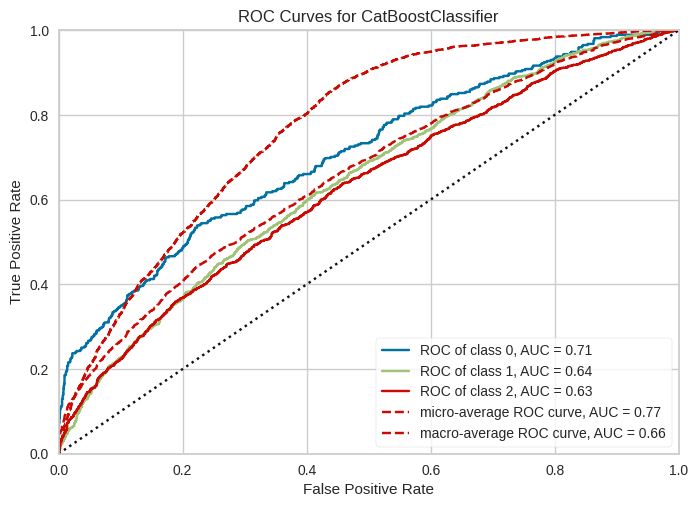

In [ ]:
#Analyze Models
#plot residuals
plot_model(best, plot = 'auc') #residuals plot was not available

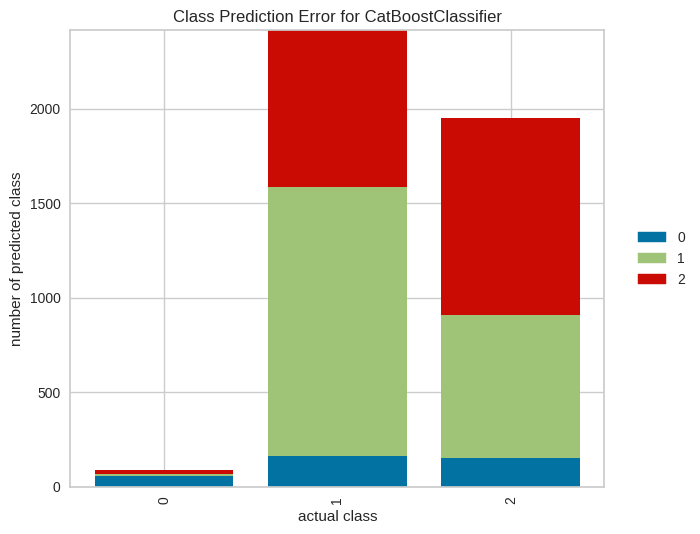

In [ ]:
#plot error
plot_model(best, plot = 'error')

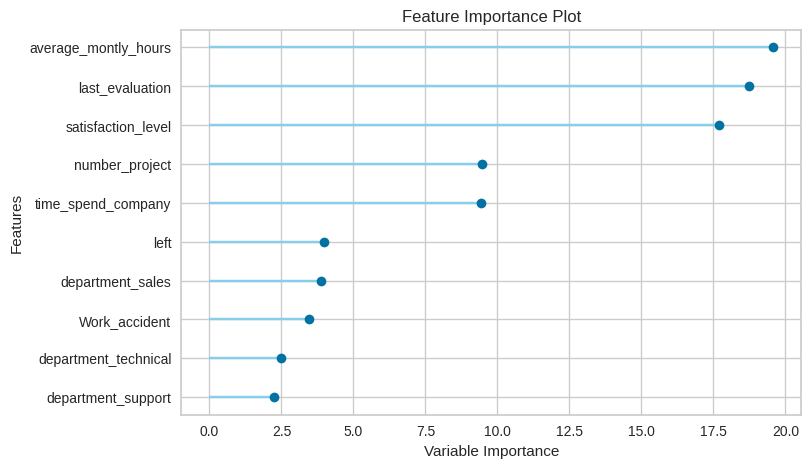

In [ ]:
#plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
#Predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.5604,0.6407,0.5604,0.5649,0.5492,0.1939,0.1955


In [ ]:
holdout_pred.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,left,salary,prediction_label,prediction_score
4343,0.72,0.86,4,137,2,0,0,product_mng,0,low,medium,0.5249
4244,0.49,0.48,3,190,2,0,0,technical,0,medium,low,0.4820
2935,0.29,0.48,2,116,6,1,0,hr,0,low,medium,0.7474
2922,0.72,0.51,4,164,3,0,0,sales,0,medium,low,0.5274
13174,0.60,0.60,4,147,3,0,0,support,0,low,low,0.4778


In [ ]:
new_data = data.copy()
new_data.drop('salary', axis = 1, inplace = True)
new_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,left
0,0.38,0.53,2,157,3,0,0,sales,1
1,0.80,0.86,5,262,6,0,0,sales,1
2,0.11,0.88,7,272,4,0,0,sales,1
3,0.72,0.87,5,223,5,0,0,sales,1
4,0.37,0.52,2,159,3,0,0,sales,1


In [ ]:
#predict model on new data
predictions = predict_model(best, data = new_data)
predictions.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,left,prediction_label,prediction_score
0,0.38,0.53,2,157,3,0,0,sales,1,low,0.6798
1,0.80,0.86,5,262,6,0,0,sales,1,low,0.7892
2,0.11,0.88,7,272,4,0,0,sales,1,medium,0.5140
3,0.72,0.87,5,223,5,0,0,sales,1,low,0.7804
4,0.37,0.52,2,159,3,0,0,sales,1,low,0.7491


In [ ]:
#Save Model
#Save Pipeline
save_model(best, 'best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['satisfaction_level',
                                              'last_evaluation',
                                              'number_project',
                                              'average_montly_hours',
                                              'time_spend_company',
                                              'Work_accident',
                                              'promotion_last_5years',...
                                                               strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(exclude=None, include=['department'],
    

In [ ]:
#load pipeline
loaded_best_pipeline = load_model('best_model')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['satisfaction_level',
                                             'last_evaluation',
                                             'number_project',
                                             'average_montly_hours',
                                             'time_spend_company',
                                             'Work_accident',
                                             'promotion_la...
                                                              strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(exclude=None, include=['department'],
                                    transformer=OneHotEncoder(cols=['department'],
                                                              drop_invariant=False,
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0))),
                ('trained_model',
                 <catboost.core.CatBoostClassifier object at 0x7d165c04bbb0>)],
         verbose=False)